**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity 
BASE DIRECTORY (FD_BASE): /mount 
REPO DIRECTORY (FD_REPO): /mount/repo 
WORK DIRECTORY (FD_WORK): /mount/work 
DATA DIRECTORY (FD_DATA): /mount/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /mount/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /mount/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /mount/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /mount/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /mount/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /mount/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /mount/repo/Proj_ENCODE_FCC/log 
PROJECT APP     (FD_APP): /mount/repo/Proj_ENCODE_FCC/app 
PROJECT REF     (FD_REF): /mount/repo/Proj_ENCODE_FCC/references 



In [2]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
txt_fname = "region.summary.fcc_peak_call.label.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_region_annot_fcc_label = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 155926     18


Chrom,ChromStart,ChromEnd,Region,Type,Num_Assay,TSS_Total,TSS_Essential,Label1,Label2,Screen_CRISPR_Total,Screen_CRISPR_Growth,Screen_CRISPR_HCRFF,Screen_CRISPR_E2G,Signif_CRISPR_Total,Signif_CRISPR_Growth,Signif_CRISPR_HCRFF,Signif_CRISPR_E2G
chr1,10038,10405,chr1:10038-10405,Repressor,1,0,0,Repressor,Repressor,0,0,0,0,0,0,0,0
chr1,10038,10405,chr1:10038-10405,Repressor_GCFilter,1,0,0,Repressor_GCFilter,Repressor_GCFilter,0,0,0,0,0,0,0,0
chr1,16025,16338,chr1:16025-16338,Repressor,1,0,0,Repressor,Repressor,0,0,0,0,0,0,0,0


In [3]:
table(dat$Type)


          Enhancer          Repressor Repressor_GCFilter 
             43993              65401              46532 

In [4]:
table(dat$Label1)


              Enhancer              Repressor     Repressor_GCFilter 
                 35731                  61395                  45615 
          TSS:Enhancer          TSS:Repressor TSS:Repressor_GCFilter 
                  8262                   4006                    917 

In [5]:
table(dat$Label2)


          Enhancer           Promoter          Repressor Repressor_GCFilter 
             35731              13185              61395              45615 

## Total

In [21]:
vec = c("Enhancer", "Repressor")
dat = dat_region_annot_fcc_label
dat = dat %>% 
    dplyr::filter(Type %in% vec) %>%
    dplyr::filter(Num_Assay > 1) %>%
    dplyr::distinct()

dat_region_annot_subset = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 18346    18


Chrom,ChromStart,ChromEnd,Region,Type,Num_Assay,TSS_Total,TSS_Essential,Label1,Label2,Screen_CRISPR_Total,Screen_CRISPR_Growth,Screen_CRISPR_HCRFF,Screen_CRISPR_E2G,Signif_CRISPR_Total,Signif_CRISPR_Growth,Signif_CRISPR_HCRFF,Signif_CRISPR_E2G
chr1,778233,779389,chr1:778233-779389,Enhancer,3,0,0,Enhancer,Enhancer,1,1,0,0,0,0,0,0
chr1,958722,959968,chr1:958722-959968,Enhancer,2,1,0,TSS:Enhancer,Promoter,1,1,0,0,0,0,0,0
chr1,960468,961615,chr1:960468-961615,Enhancer,2,1,0,TSS:Enhancer,Promoter,1,1,0,0,0,0,0,0


In [54]:
vec = c("Enhancer", "Repressor")
dat = dat_region_annot_subset
dat = dat %>% 
    dplyr::mutate(Label = Label2) %>% 
    dplyr::select(Region, Type, Label) %>% 
    dplyr::distinct()

dat = dat %>%
    dplyr::group_by(Label) %>%
    dplyr::summarise(Count = n(), .groups = "drop")

dat_region_annot_summary = dat
print(dim(dat))
fun_display_table(dat)

[1] 3 2


Label,Count
Enhancer,11623
Promoter,5083
Repressor,1640


In [56]:
dat = dat_region_annot_summary
dat = dat %>%
    dplyr::mutate(
        Count_Label = ifelse(
            Count > 1000, 
            paste0(round(Count / 1000, 1), "K"),
            Count
        )
    ) %>%
    dplyr::mutate(Label2 = paste0(Label, " ", "(", Count_Label, ")"))

vec = c("Enhancer", "Promoter", "Repressor")
dat = dat %>% 
    dplyr::mutate(Label = factor(Label, levels=rev(vec))) %>% 
    dplyr::arrange(Label) %>%
    dplyr::mutate(Label2 = factor(Label2, levels=Label2))

dat_region_annot_plot = dat

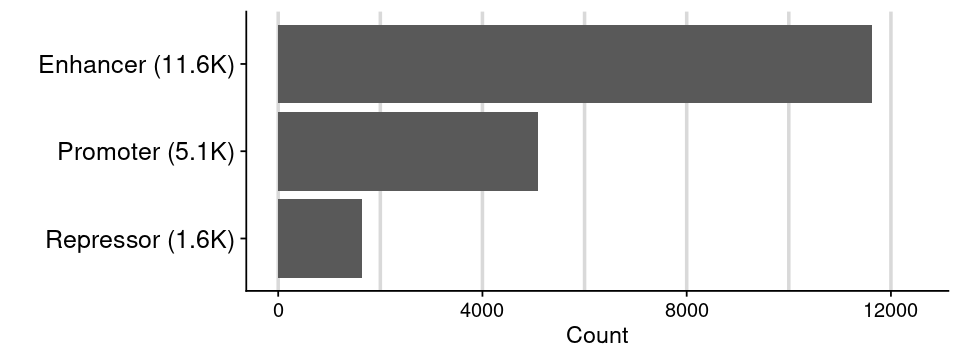

In [57]:
dat = dat_region_annot_plot
gpt = ggplot(dat, aes(y = Label2, x = Count)) + 
    geom_bar(stat = "identity") +
    labs(y = "") +
    xlim(0, 12500) +
    theme_cowplot() +
    background_grid(
        major = "x",
        minor = "x",
        size.major = 1,
        size.minor = 1,
    ) +
    theme(axis.text.y = element_text(size=15))

options(repr.plot.height=3, repr.plot.width=8)
print(gpt)

## CRISPR

In [58]:
vec = c("Enhancer", "Repressor")
dat = dat_region_annot_subset
dat = dat %>% 
    dplyr::filter(Screen_CRISPR_Total == 1) %>%
    dplyr::mutate(Label = Label2) %>%
    dplyr::mutate(CRISPR = Signif_CRISPR_Total) %>%
    dplyr::select(Region, Type, Label, CRISPR) %>% 
    dplyr::mutate(CRISPR = ifelse(CRISPR == 1, "Significant", "Not Significant")) %>%
    dplyr::distinct()

dat = dat %>%
    dplyr::group_by(Label, CRISPR) %>%
    dplyr::summarise(Count = n(), .groups = "drop") %>%
    dplyr::group_by(Label) %>%
    dplyr::mutate(Total = sum(Count)) %>%
    dplyr::ungroup() %>%
    dplyr::mutate(Freq = Count / Total)

dat_region_annot_summary_crispr = dat
print(dim(dat))
fun_display_table(dat)

[1] 6 5


Label,CRISPR,Count,Total,Freq
Enhancer,Not Significant,8688,9273,0.9369136
Enhancer,Significant,585,9273,0.0630864
Promoter,Not Significant,4034,5057,0.7977061
Promoter,Significant,1023,5057,0.2022939
Repressor,Not Significant,913,958,0.9530271
Repressor,Significant,45,958,0.0469729


In [67]:
dat = dat_region_annot_summary_crispr
tmp = dat %>%
    dplyr::filter(CRISPR == "Significant") %>%
    dplyr::mutate(Freq_Label = paste0(round(Freq * 100, 1), "%")) %>%
    dplyr::mutate(Label2 = paste0(Label, " ", "(", Freq_Label, ")")) %>%
    dplyr::select(Label, Label2)

dat = dat_region_annot_summary_crispr
dat = dplyr::left_join(dat, tmp, by = "Label")

vec = c("Enhancer", "Promoter", "Repressor")
dat = dat %>% 
    dplyr::mutate(Label = factor(Label, levels=rev(vec))) %>% 
    dplyr::arrange(Label) %>%
    dplyr::mutate(Label2 = factor(Label2, levels=unique(Label2)))

dat_region_annot_plot = dat
dat

Label,CRISPR,Count,Total,Freq,Label2
<fct>,<chr>,<int>,<int>,<dbl>,<fct>
Repressor,Not Significant,913,958,0.95302714,Repressor (4.7%)
Repressor,Significant,45,958,0.04697286,Repressor (4.7%)
Promoter,Not Significant,4034,5057,0.79770615,Promoter (20.2%)
Promoter,Significant,1023,5057,0.20229385,Promoter (20.2%)
Enhancer,Not Significant,8688,9273,0.93691362,Enhancer (6.3%)
Enhancer,Significant,585,9273,0.06308638,Enhancer (6.3%)


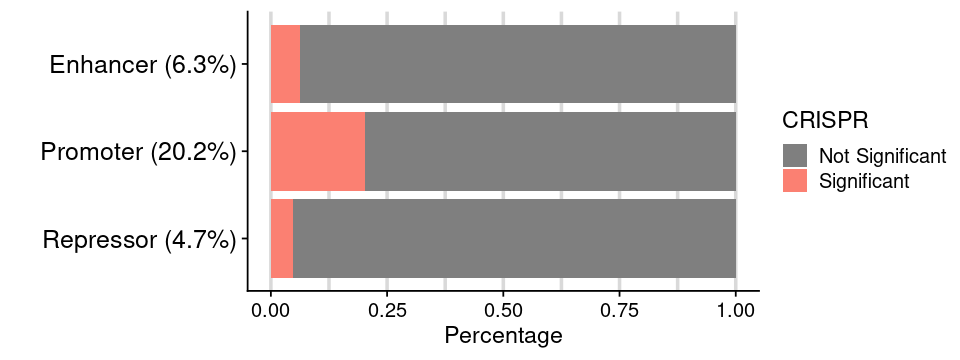

In [68]:
dat = dat_region_annot_plot                      
gpt = ggplot(dat, aes(y = Label2, x = Freq, fill = CRISPR)) + 
    geom_bar(stat = "identity") +
    scale_fill_manual(values = c("grey50", "#fb8072")) +
    labs(x="Percentage", y = "") +
    theme_cowplot() +
    background_grid(
        major = "x",
        minor = "x",
        size.major = 1,
        size.minor = 1,
    ) +
    theme(axis.text.y = element_text(size=15))

options(repr.plot.height=3, repr.plot.width=8)
print(gpt)

In [77]:
dat = dat_region_annot_subset
dat = dat %>% dplyr::filter(Num_Assay > 1)

vec = dat$Region
vec = unique(vec)
print(length(vec))

[1] 18341


In [80]:
dat = dat_region_annot_subset
dat = dat %>% dplyr::filter(Num_Assay > 1)
dat = dat %>% dplyr::filter(Screen_CRISPR_Total == 1)

vec = dat$Region
vec = unique(vec)
print(length(vec))

[1] 15285


In [81]:
dat = dat_region_annot_subset
dat = dat %>% dplyr::filter(Num_Assay > 1)
dat = dat %>% dplyr::filter(Screen_CRISPR_Total == 1)
dat = dat %>% dplyr::filter(Signif_CRISPR_Total == 1)

vec = dat$Region
vec = unique(vec)
print(length(vec))

[1] 1652


In [75]:
dat = dat_region_annot_summary
vec = dat$Count
num = sum(vec)
print(num)

[1] 18346


In [70]:
dat = dat_region_annot_summary_crispr
vec = dat$Count
num = sum(vec)
print(num)

dat = dat_region_annot_summary_crispr
dat = dat %>% dplyr::filter(CRISPR == "Significant")
vec = dat$Count
num = sum(vec)
print(num)

[1] 15288
[1] 1653


In [18]:
dat = dat_region_annot_subset

dat = dat %>% 
    dplyr::filter(Screen_CRISPR_Total == 1) %>%
    dplyr::mutate(
        Label  = Label2,
        CRISPR = Signif_CRISPR_Total
    )

dat = dat %>% 
    dplyr::select(Region, Type, Label, CRISPR) %>%
    dplyr::mutate(CRISPR = ifelse(CRISPR == 1, "Significant", "Not Significant")) %>% 
    dplyr::distinct()

dat = dat %>%
    dplyr::group_by(Label, CRISPR) %>%
    dplyr::summarise(Count = n(), .groups = "drop") %>%
    dplyr::group_by(Label) %>%
    dplyr::mutate(Total = sum(Count)) %>%
    dplyr::ungroup() %>%
    dplyr::mutate(Freq = Count / Total)

dat_region_annot_summary = dat
print(dim(dat))
fun_display_table(dat)

[1] 6 5


Label,CRISPR,Count,Total,Freq
Enhancer,Not Significant,8688,9273,0.9369136
Enhancer,Significant,585,9273,0.0630864
Promoter,Not Significant,4034,5057,0.7977061
Promoter,Significant,1023,5057,0.2022939
Repressor,Not Significant,913,958,0.9530271
Repressor,Significant,45,958,0.0469729


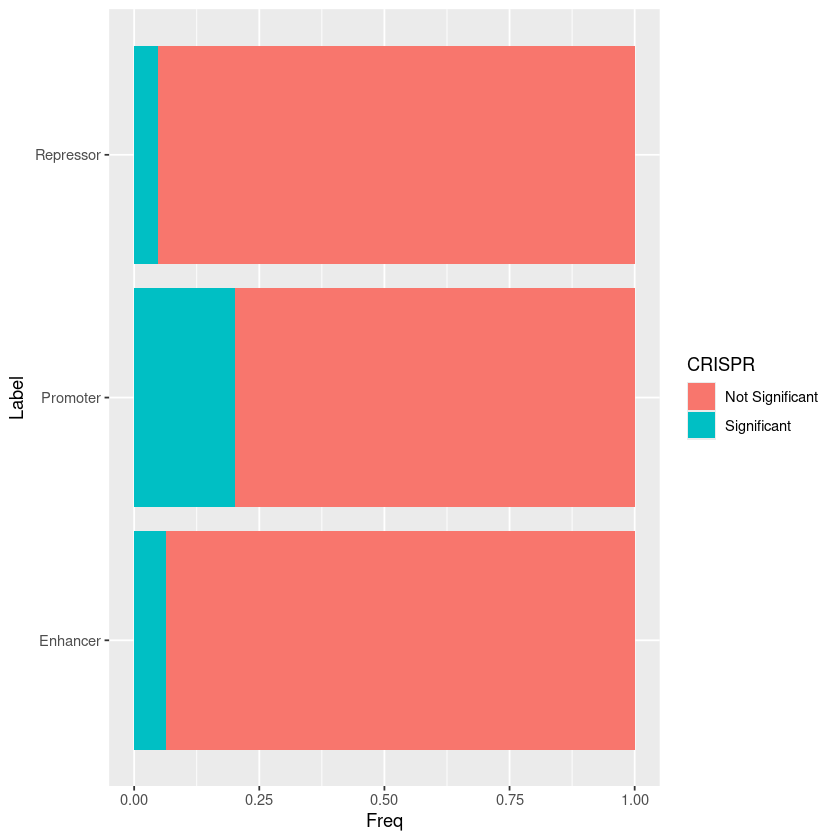

In [20]:
dat = dat_region_annot_summary
gpt = ggplot(dat, aes(x=Freq, y = Label, fill = CRISPR)) +
    geom_bar(position="stack", stat="identity")

print(gpt)

In [30]:
vec = c("Enhancer", "Repressor")
dat = dat_region_annot_fcc_label
dat = dat %>% 
    dplyr::filter(Type %in% vec) %>%
    dplyr::filter(Num_Assay > 1) %>%
    dplyr::select(Region, Label2, CRISPR) %>% 
    dplyr::distinct()

dat = dat %>%
    dplyr::mutate(Label = Label2) %>%
    dplyr::mutate(CRISPR = ifelse(CRISPR == 1, "Significant", "Not screened/Not Significant"))
    

dat = dat %>%
    dplyr::group_by(Label, CRISPR) %>%
    dplyr::summarise(Count = n(), .groups = "drop")

dat_region_annot_summary = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 6 3


Label,CRISPR,Count
Enhancer,Not screened/Not Significant,11038
Enhancer,Significant,585
Promoter,Not screened/Not Significant,4059


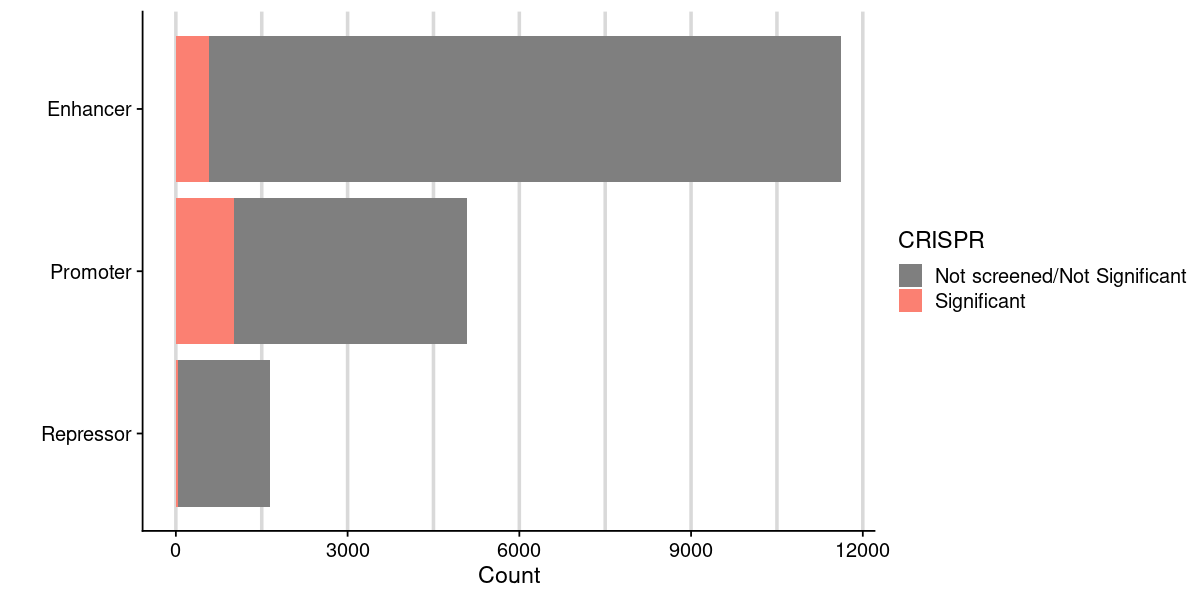

In [36]:
dat = dat_region_annot_summary
vec = c("Enhancer", "Promoter", "Repressor")
dat = dat %>% dplyr::mutate(Label = factor(Label, levels=rev(vec)))
                            
gpt = ggplot(dat, aes(y = Label, x = Count, fill = CRISPR)) + 
    geom_bar(stat = "identity") +
    scale_fill_manual(values = c("grey50", "#fb8072")) +
    labs(y = "") +
    theme_cowplot() +
    background_grid(
        major = "x",
        minor = "x",
        size.major = 1,
        size.minor = 1,
    )

options(repr.plot.height=5, repr.plot.width=10)
print(gpt)